In [5]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns



df=pd.read_csv("Business.csv")
df.head()

,Product_ID,Date,Quantity_Sold,Price,Total_Sales
0,P002,2023-02-02,37,84.68,3133.16
1,P003,2023-03-02,17,69.52,1181.84
2,P005,2023-01-10,43,15.29,657.47
3,P002,2023-06-12,93,29.29,2723.97
4,P005,2023-01-21,28,32.78,917.84


In [7]:
df.shape

(1000, 5)

In [20]:
df.isnull().sum()

Product_ID       0
Date             0
Quantity_Sold    0
Price            0
Total_Sales      0
Month            0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [28]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Product_ID,1000,5,P003,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1000,NaN,NaN,NaN,2023-06-28 07:36:28.800000,2023-01-01 00:00:00,2023-03-29 00:00:00,2023-06-29 00:00:00,2023-09-29 00:00:00,2023-12-31 00:00:00,NaN
Quantity_Sold,1000.0,NaN,NaN,NaN,50.846,1.0,26.0,51.5,76.0,100.0,28.617814
Price,1000.0,NaN,NaN,NaN,55.70304,10.16,33.6375,56.235,79.11,99.65,25.937815
Total_Sales,1000.0,NaN,NaN,NaN,2862.24368,11.97,1054.64,2317.0,4341.4675,9919.0,2224.138219
Month,1000.0,NaN,NaN,NaN,6.4,1.0,3.0,6.0,9.0,12.0,3.444105


<Axes: title={'center': 'Total Sales Over Time'}, xlabel='Date'>

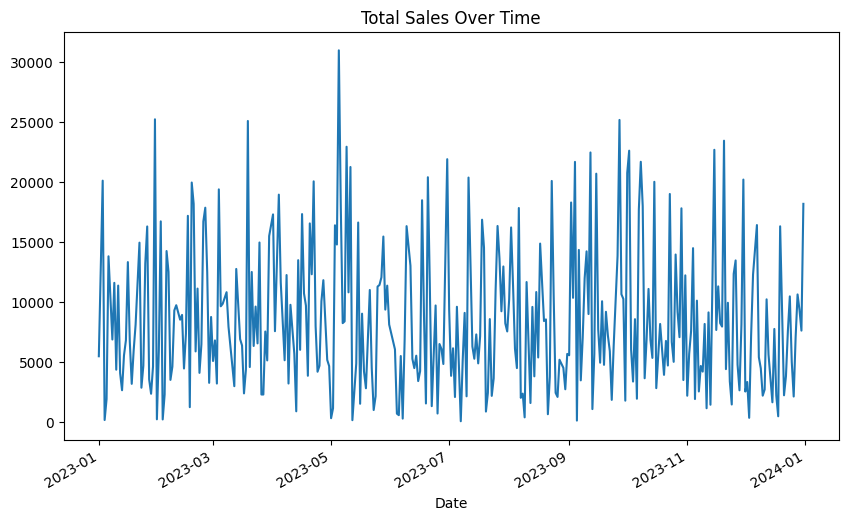

In [24]:
# Total sales over time
sales_over_time = df.groupby('Date')['Total_Sales'].sum()

# Plot
sales_over_time.plot(figsize=(10, 6), title='Total Sales Over Time')


<Axes: title={'center': 'Top 5 Best Selling Products'}, xlabel='Product_ID'>

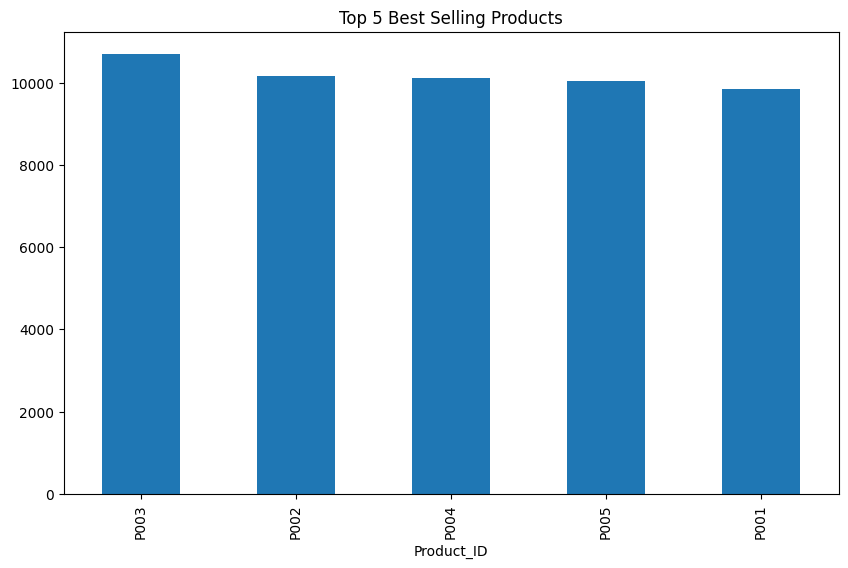

In [11]:
# Best selling products
best_selling_products = df.groupby('Product_ID')['Quantity_Sold'].sum().sort_values(ascending=False).head(5)

# Plot
best_selling_products.plot(kind='bar', figsize=(10, 6), title='Top 5 Best Selling Products')


<Axes: title={'center': 'Average Price Per Product'}, xlabel='Product_ID'>

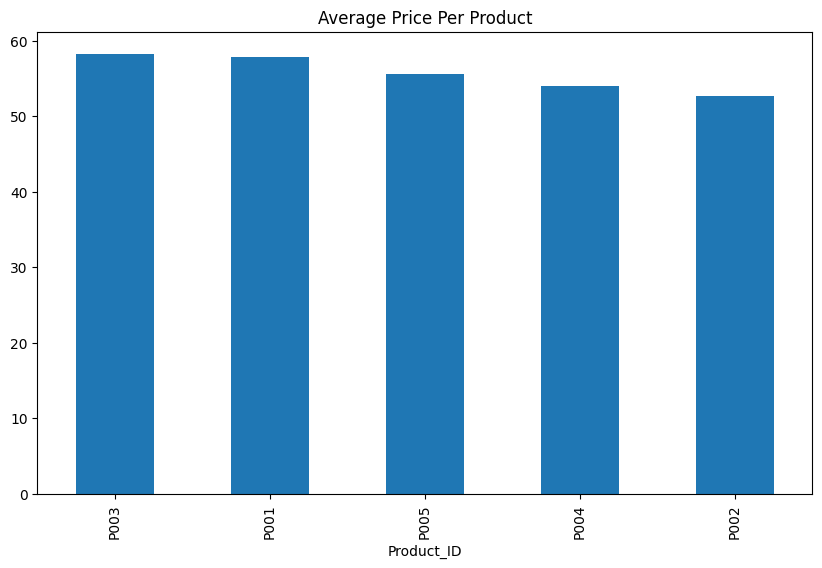

In [13]:
# Average price per product
avg_price_per_product = df.groupby('Product_ID')['Price'].mean().sort_values(ascending=False)

# Plot
avg_price_per_product.plot(kind='bar', figsize=(10, 6), title='Average Price Per Product')


<Axes: title={'center': 'Sales Performance by Month'}, xlabel='Month'>

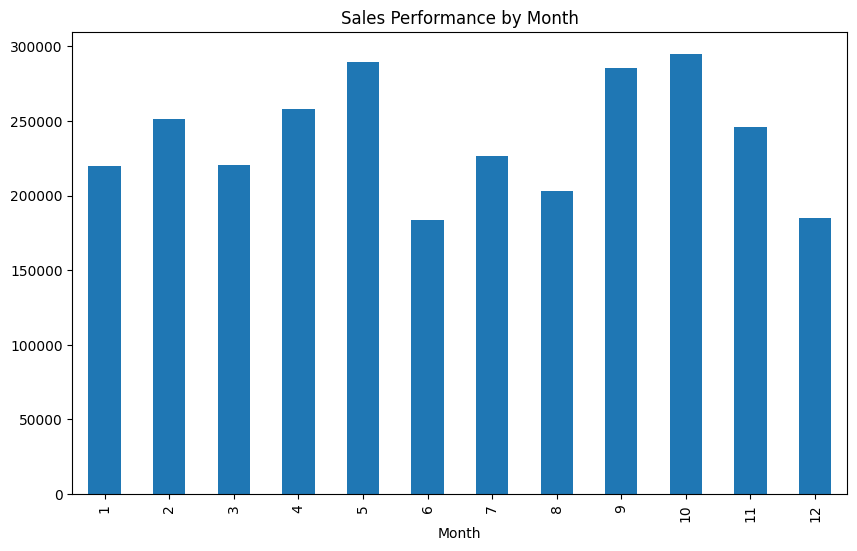

In [15]:
# Extract month from date
df['Month'] = df['Date'].dt.month

# Sales performance by month
sales_by_month = df.groupby('Month')['Total_Sales'].sum()

# Plot
sales_by_month.plot(kind='bar', figsize=(10, 6), title='Sales Performance by Month')


In [19]:
from scipy.stats import ttest_ind

# Divide products into two groups based on price
low_price = df[df['Price'] < 50]['Total_Sales']
high_price = df[df['Price'] >= 50]['Total_Sales']

# Perform t-test
t_stat, p_value = ttest_ind(low_price, high_price)

# Define significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("There is a significant difference in sales between products priced below $50 and those priced above $50.")
else:
    print("There is no significant difference in sales between products priced below $50 and those priced above $50.")


There is a significant difference in sales between products priced below $50 and those priced above $50.
